In [1]:
# Load the model that we created in Part 2
from gensim.models import Word2Vec
model = Word2Vec.load("300features_40minwords_10context")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca',\
                      n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

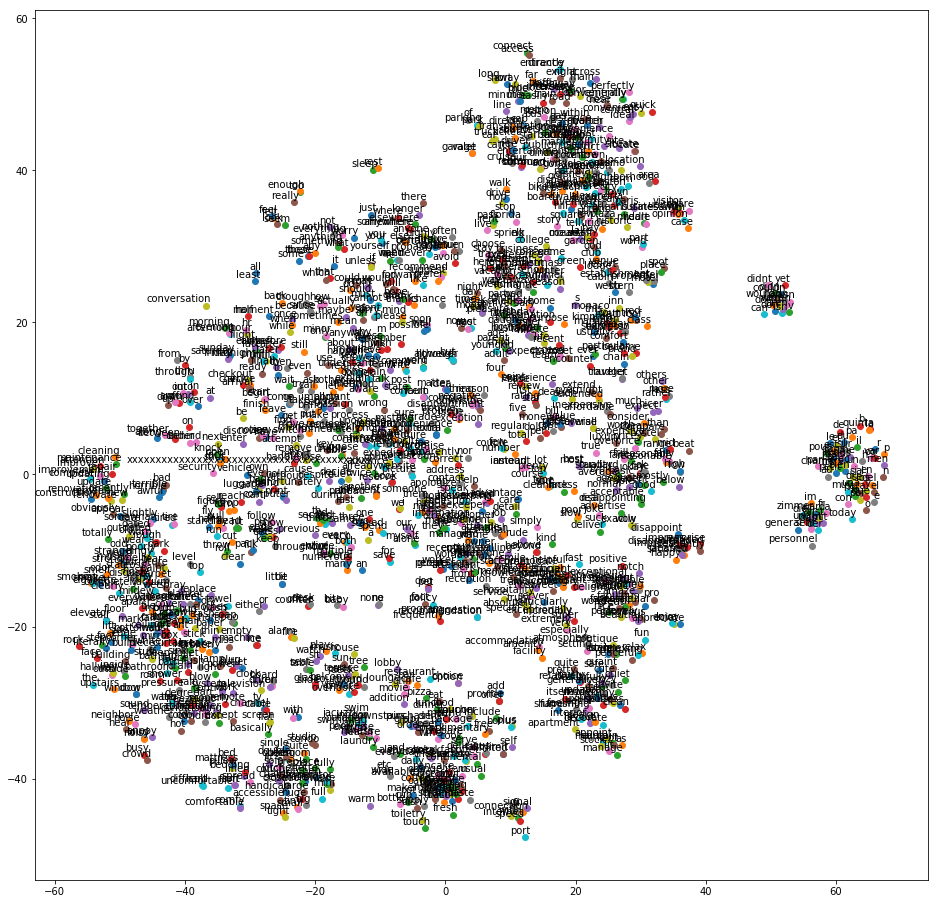

In [5]:
tsne_plot(model)

In [7]:
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.show()
    #plt.savefig(filename)

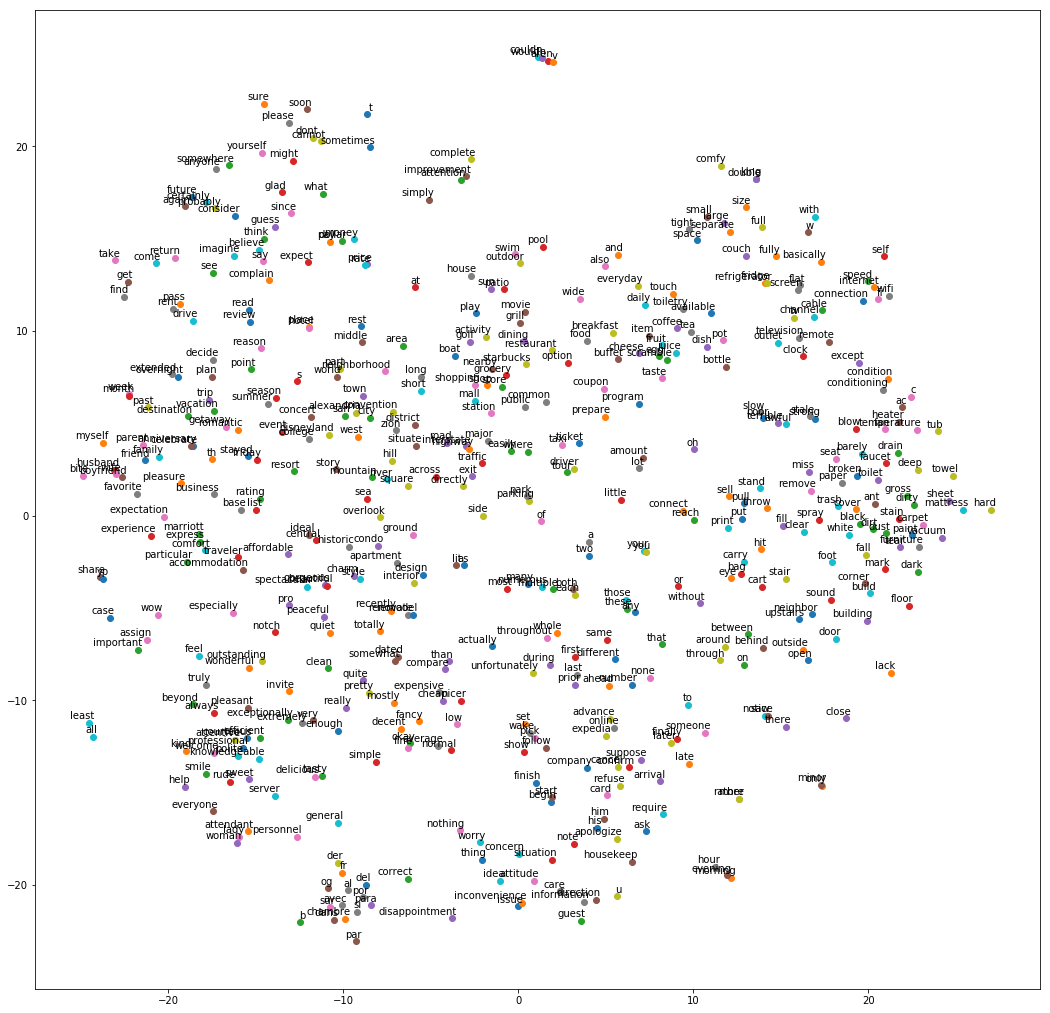

In [8]:
# pylint: disable=g-import-not-at-top
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
  
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)
    
tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000, method='exact')
plot_from = 501
plot_to = 1000
low_dim_embs = tsne.fit_transform(tokens[plot_from:plot_to])
label = labels[501:1000]
plot_with_labels(low_dim_embs, label)

In [32]:
label = labels[501:1000]


In [9]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(tokens)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

('word_vectors_matrix_2d shape is ', (1429, 2))


In [10]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[labels.index(word)])
            for word in labels
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [38]:
points.head(10)

,word,x,y
0,limited,3.801830,32.246521
1,four,2.259238,-4.649726
2,sleep,1.445196,-1.320033
3,kimpton,-17.300159,3.463145
4,paris,-20.454279,15.253541
5,bike,-7.636924,17.208612
6,under,27.260735,-1.771834
7,sorry,-4.510937,-38.118809
8,worth,-19.017273,-12.108404
9,updated,1.946081,12.382634


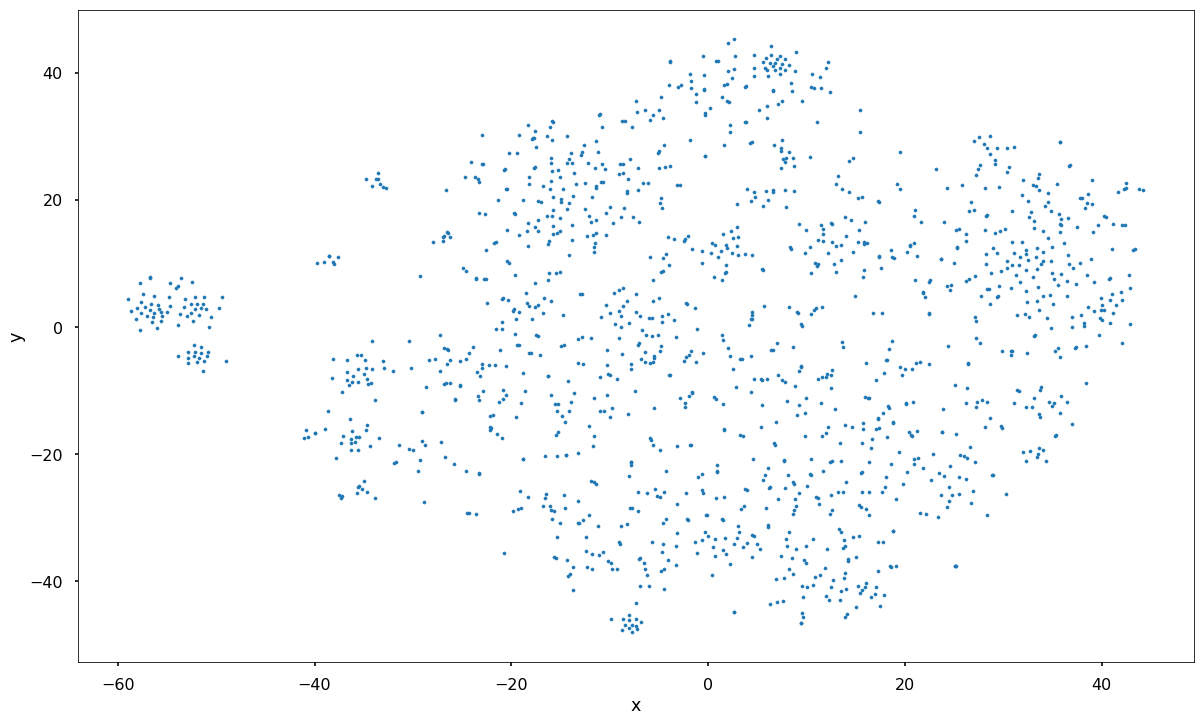

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))


In [71]:
points['y'][0]

32.24652099609375

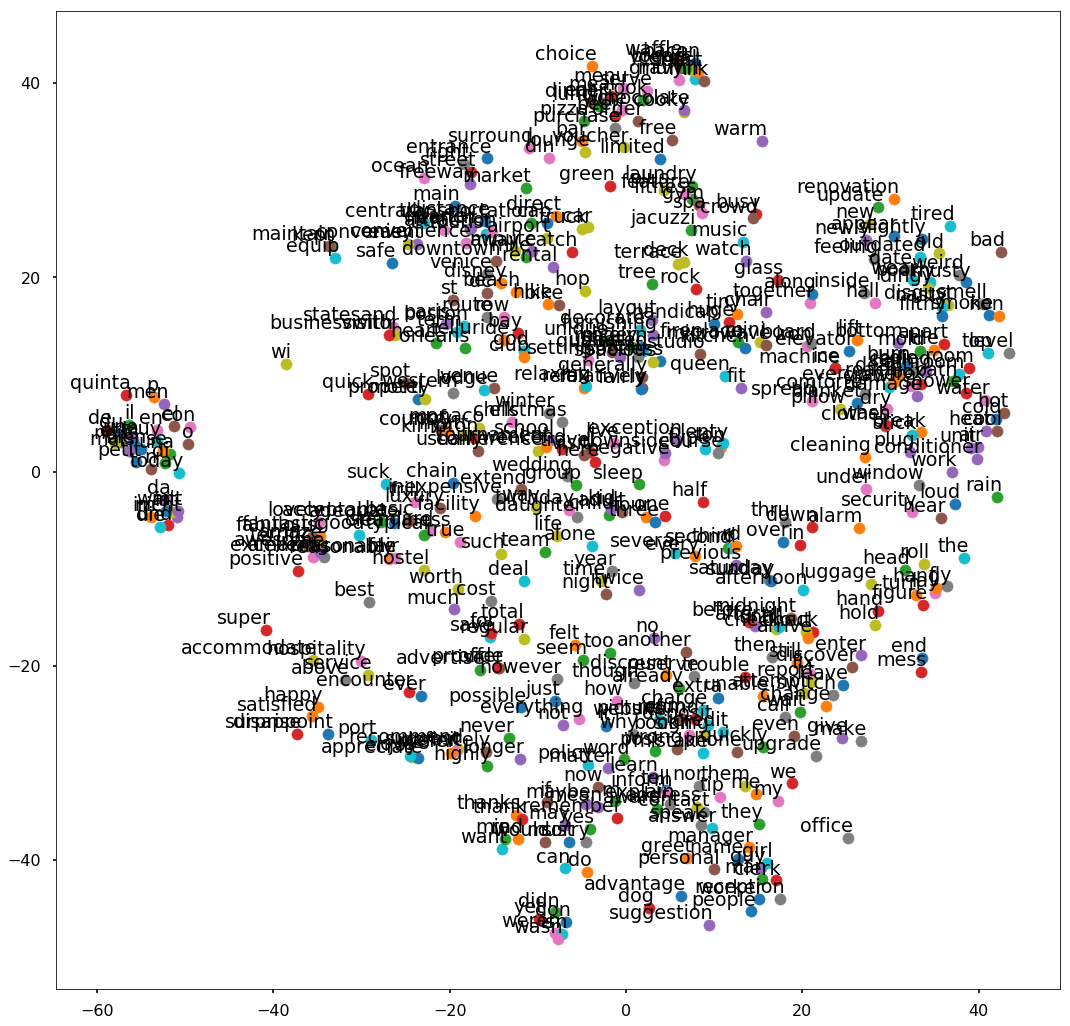

In [73]:
fig=plt.figure(figsize=(18, 18))  # in inches
for i, label in enumerate(labels[:500]):
    x = points['x'][i]
    y = points['y'][i]
    plt.scatter(x, y)
    plt.annotate(label,
                xy=(x, y),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')

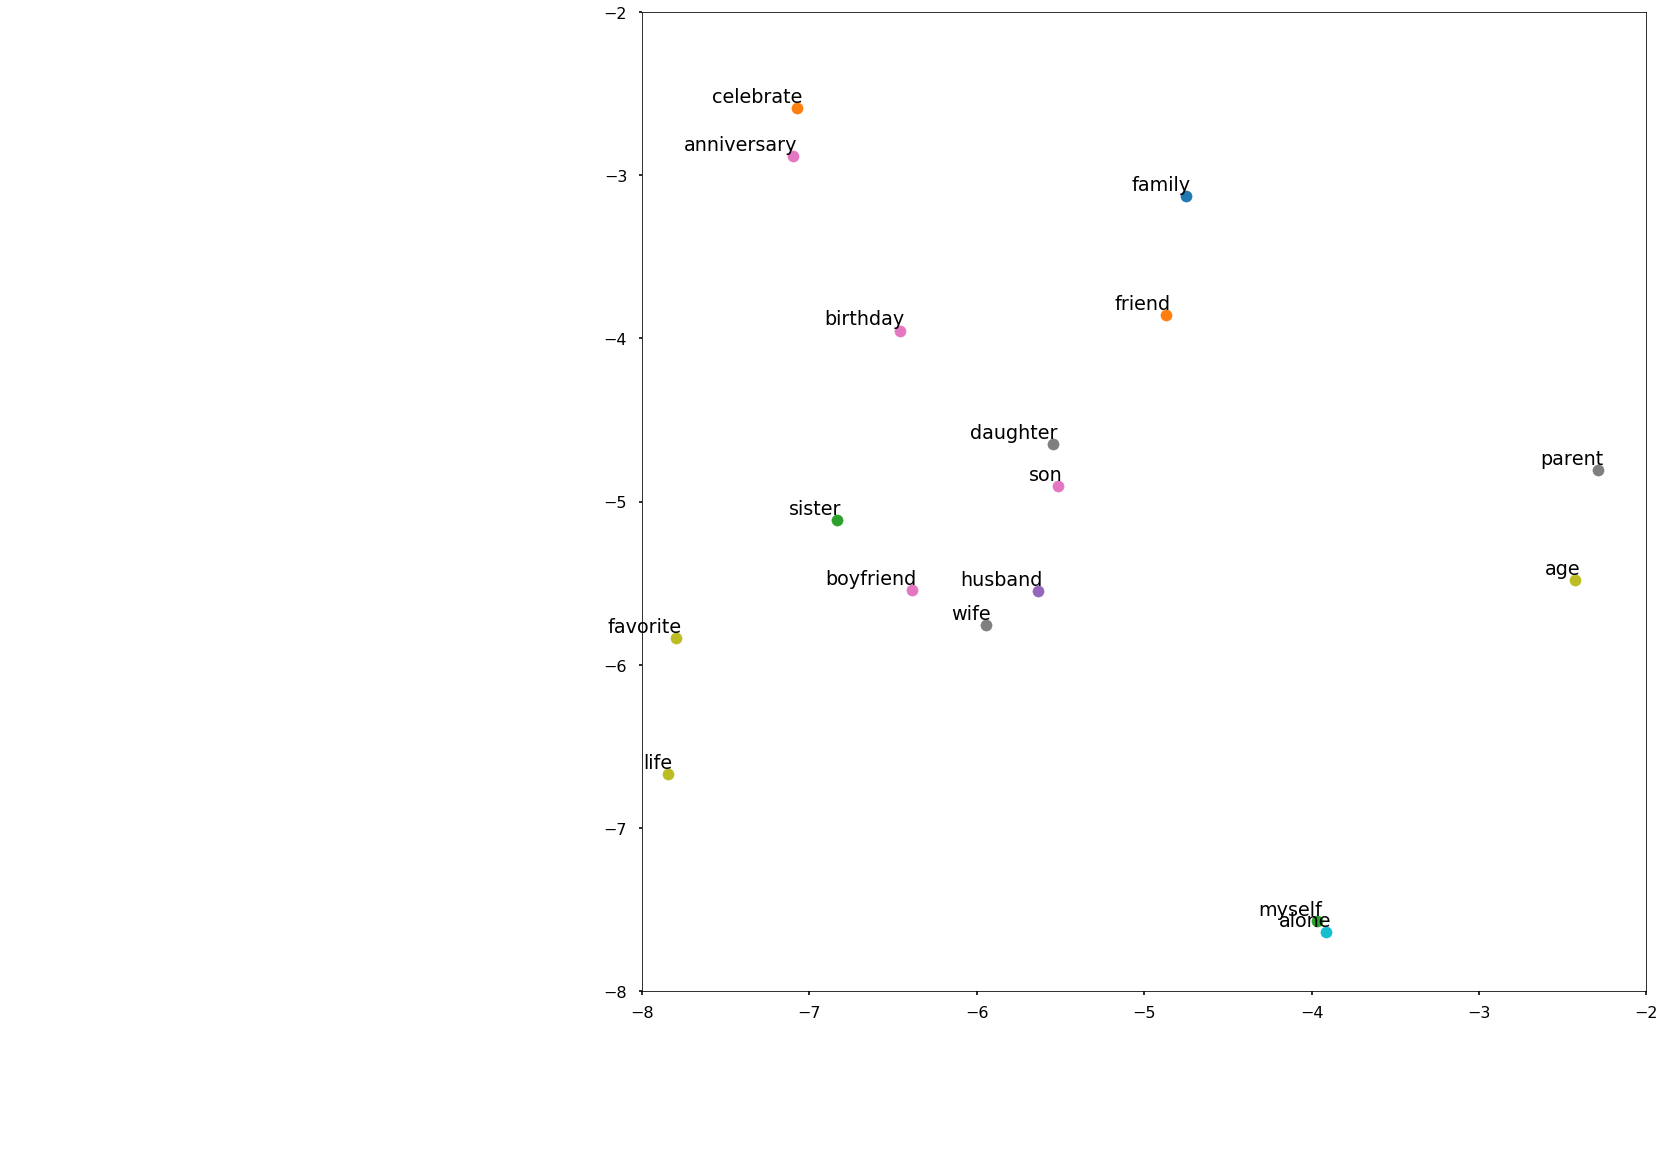

In [76]:
fig=plt.figure(figsize=(18, 18))  # in inches
for i, label in enumerate(labels):
    x = points['x'][i]
    y = points['y'][i]
    plt.scatter(x, y)
    plt.annotate(label,
                xy=(x, y),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
#[x_low,x_high,y_low,y_high]
plt.axis([-8, -2, -8, -2])
plt.show()

In [12]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
   
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

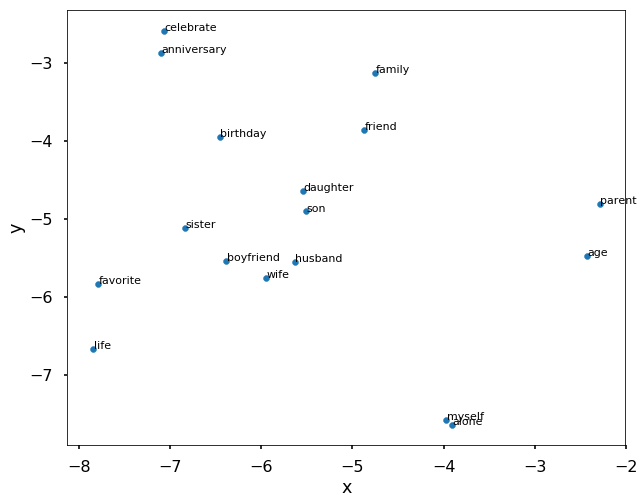

In [13]:
plot_region(x_bounds=(-8, -2.0), y_bounds=(-8, -2))

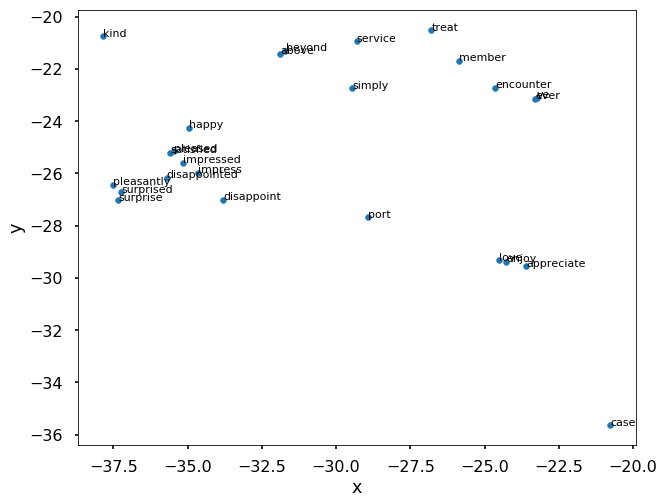

In [77]:
plot_region(x_bounds=(-40, -20), y_bounds=(-40, -20))

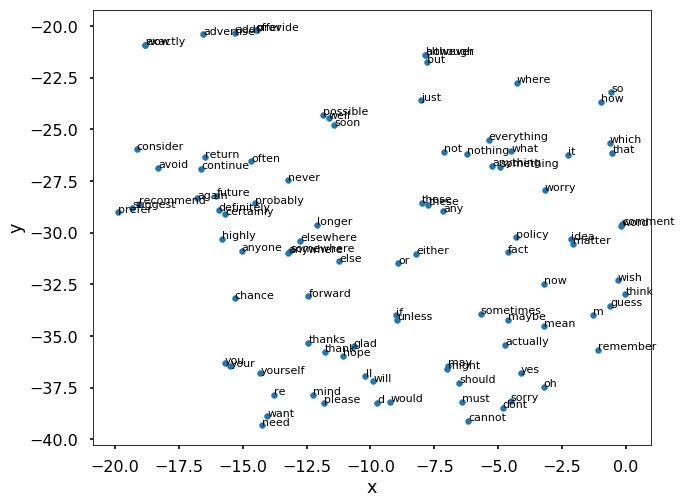

In [78]:
plot_region(x_bounds=(-20, -0), y_bounds=(-40, -20))

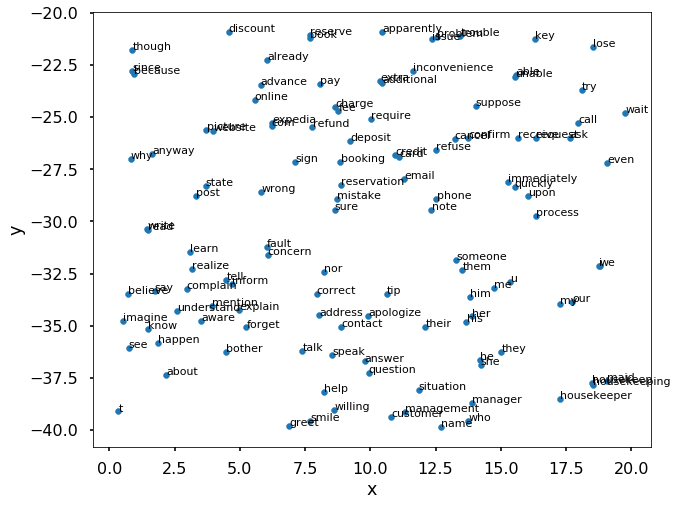

In [79]:
plot_region(x_bounds=(0, 20), y_bounds=(-40, -20))

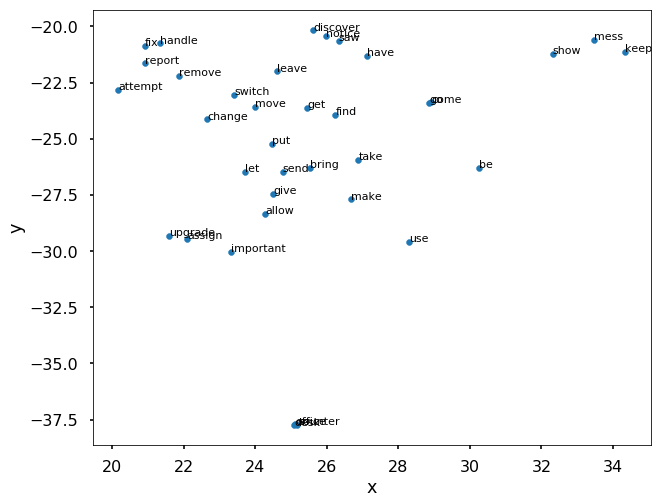

In [80]:
plot_region(x_bounds=(20, 40), y_bounds=(-40, -20))

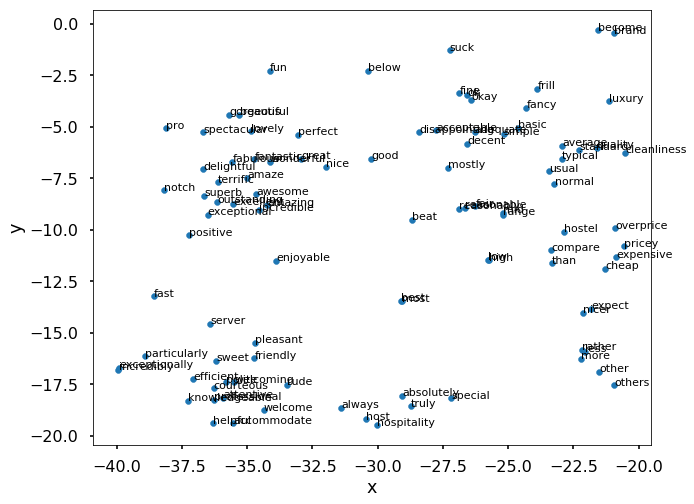

In [81]:
plot_region(x_bounds=(-40, -20), y_bounds=(-20, 0))

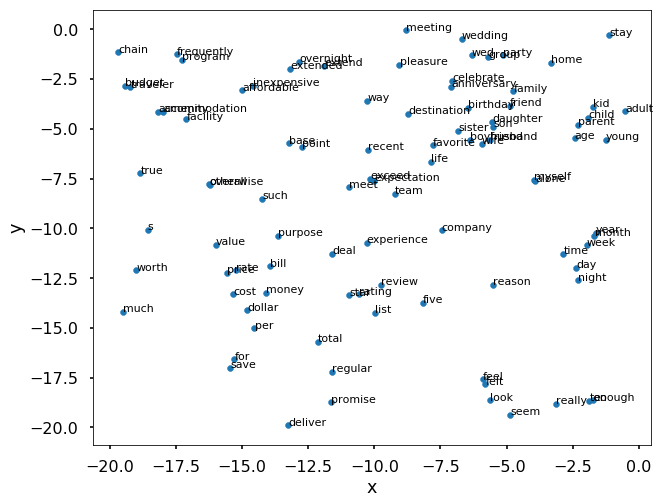

In [82]:
plot_region(x_bounds=(-20, 0), y_bounds=(-20, 0))

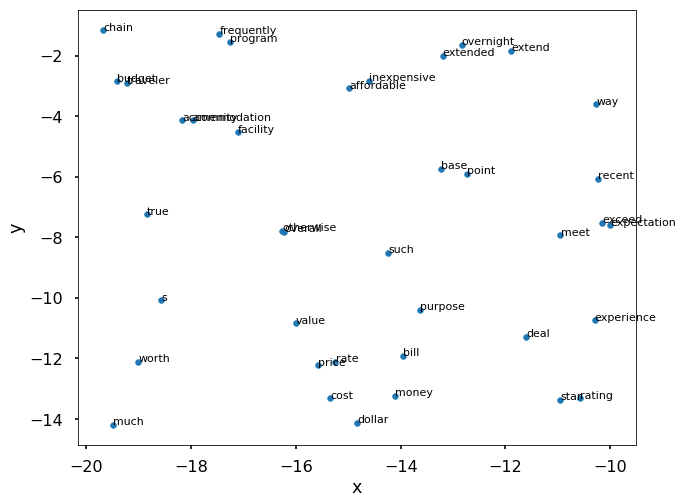

In [91]:
plot_region(x_bounds=(-20, -10), y_bounds=(-15, 0))

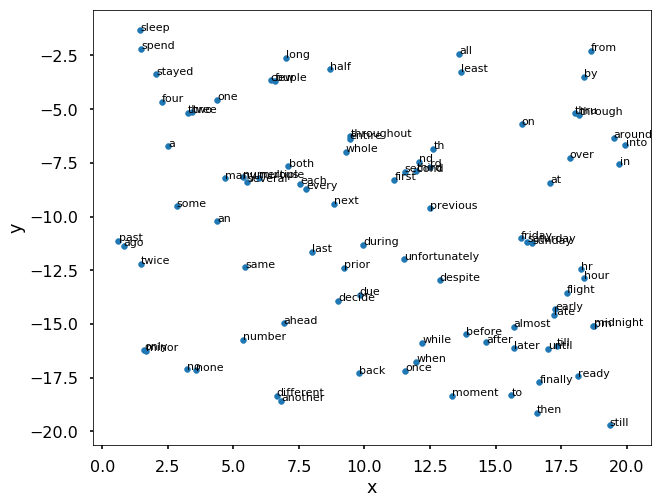

In [83]:
plot_region(x_bounds=(0, 20), y_bounds=(-20, 0))

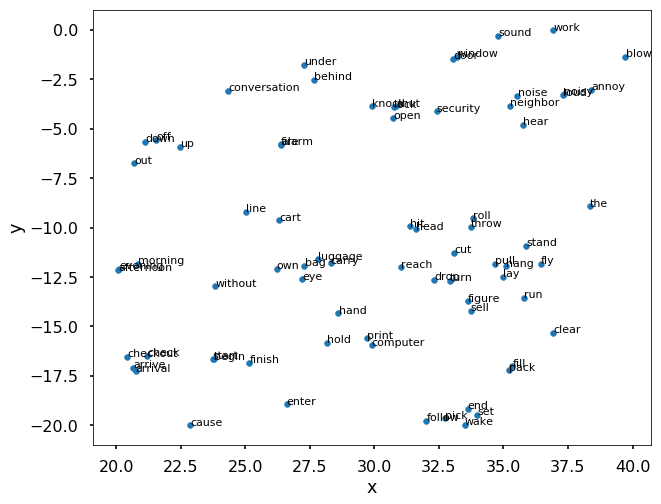

In [84]:
plot_region(x_bounds=(20, 40), y_bounds=(-20, 0))

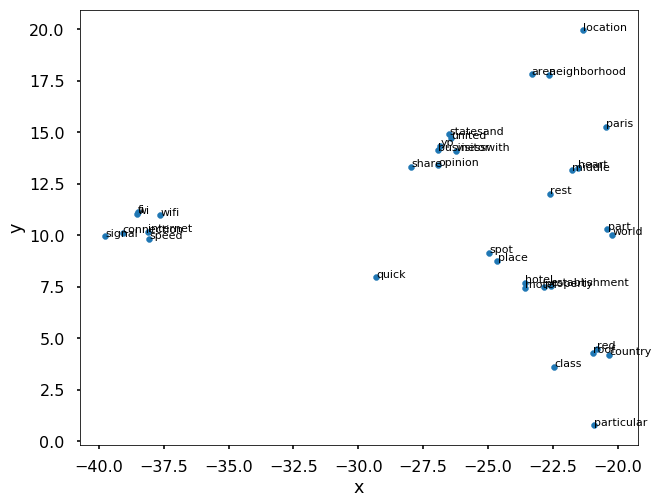

In [85]:
plot_region(x_bounds=(-40, -20), y_bounds=(0, 20))

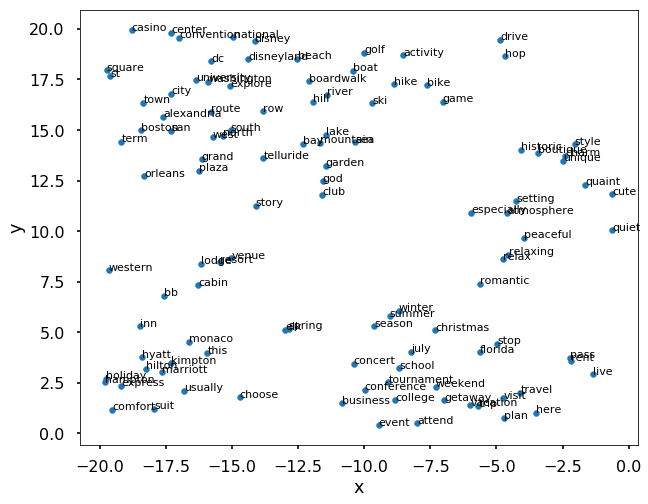

In [86]:
plot_region(x_bounds=(-20, 0), y_bounds=(0, 20))

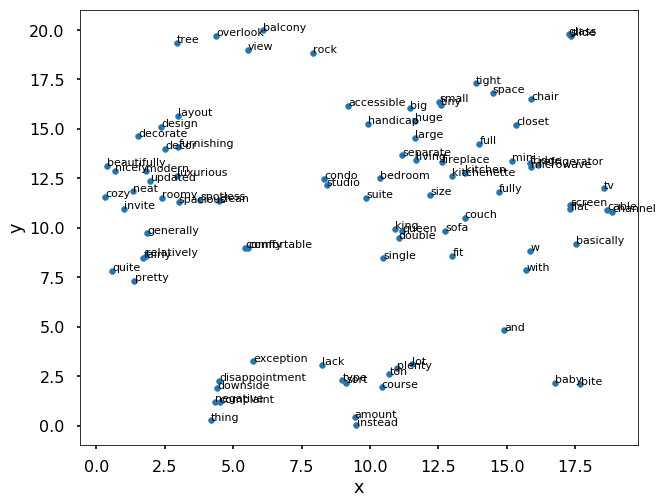

In [87]:
plot_region(x_bounds=(0, 20), y_bounds=(0, 20))

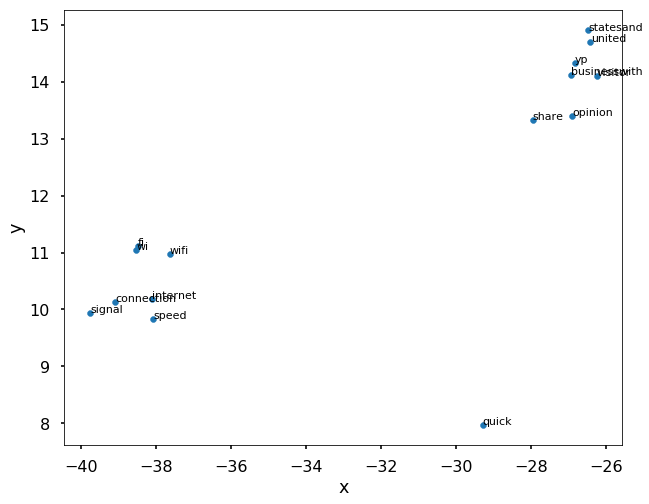

In [17]:
plot_region(x_bounds=(-40, -25), y_bounds=(5, 20))